### Producto privado
$
\left |\varphi_{ab} \right> = \sum_{i=0}^{p-1} w^{βi} \left|i+α\right> \left|i\right>
$ 

In [1]:
# Importo todo de qiskit
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info.states import Statevector
from funciones.encondings import encondings
from funciones.U_function import U_gate
from funciones.R_function import Ri_gate
import random

dim=3
alpha=4         # Raíz primitiva
beta=2           # Raíz primitiva
a=2
b=2
p=dim

#enconding = random.randint(1, 4)
#encondings(enconding,a,b,p,beta,alpha)

# Creo la puerta U:
U = U_gate(dim, alpha)

# Creo un array de QuantumCircuits
num_circuits = 2**dim
qc = []
for i in range (0,num_circuits):
    # Creo la puerta R con el i determinado
    R = Ri_gate(dim,b,p,i)


    # Creo el circuito para el estado |i>
    qc_i = QuantumCircuit(dim)
    # Creo el ket |i> para la dimesión dim
    i_bin = bin(i)[2:].zfill(dim)
    ket_i = Statevector.from_label(i_bin)   #|i>
    qc_i.initialize(ket_i.data, [0,1,2])  


    # Creo el circuito para el estado w^bi|i+a>
    qc_i_a = QuantumCircuit(dim)
    qc_i_a.initialize(ket_i.data, [0,1,2]) 
    # Aplico la puerta U para conseguir |i+a>
    qc_i_a.unitary(U, [0,1,2], label="U")
    # Aplico la puerta R para conseguir w^bi|i+a>
    qc_i_a.unitary(R, [0,1,2], label="R")

    qc_i.barrier()
    qc_i_a.barrier()

    # Circuito resultante para el poducto tensorial de qc_0 y qc_0_a
    qc_i = qc_i.tensor(qc_i_a)
    # Guardo el circuito en el array de circuitos
    qc.append(qc_i)
    



ExtensionError: 'Input matrix is not an N-qubit operator.'

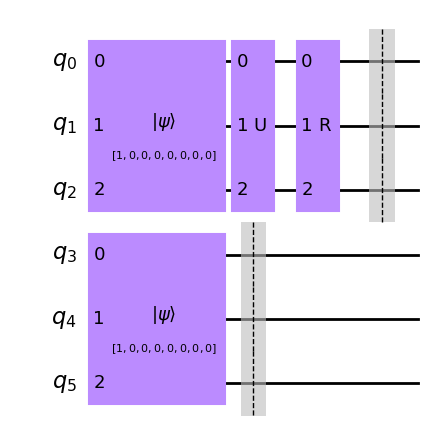

In [45]:
qc_0 = qc[0]
qc_0.draw('mpl')

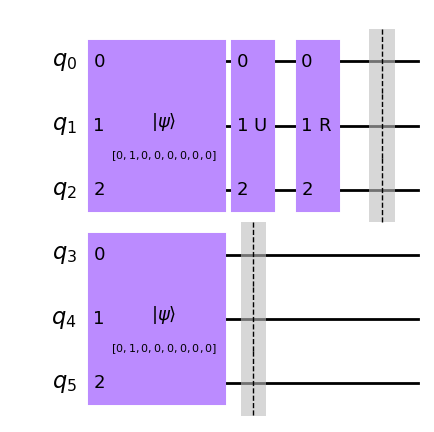

In [46]:
qc_1 = qc[1]
qc_1.draw('mpl')

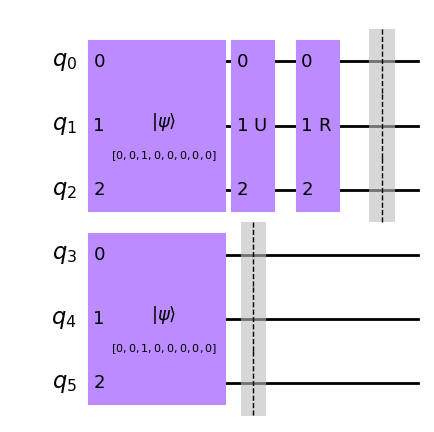

In [47]:
qc_2 = qc[2]
qc_2.draw('mpl')

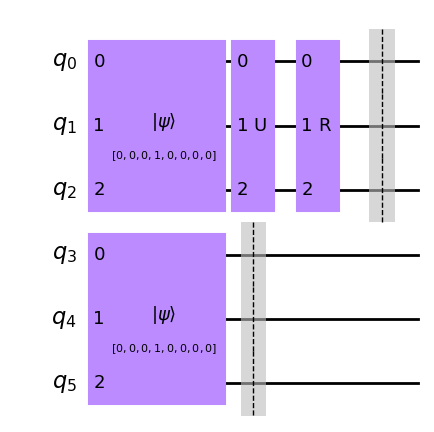

In [48]:
qc_3 = qc[3]
qc_3.draw('mpl')

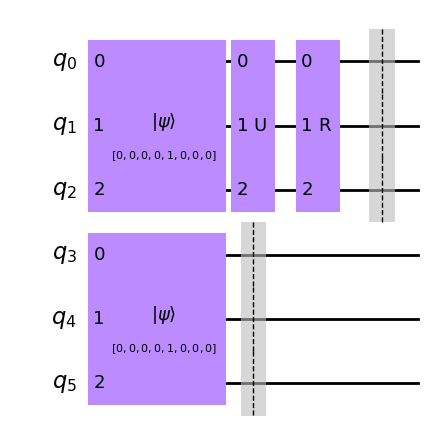

In [49]:
qc_4 = qc[4]
qc_4.draw('mpl')

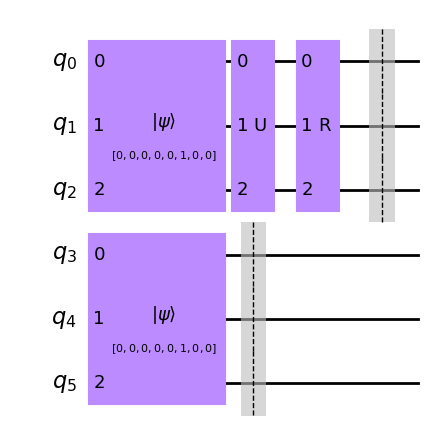

In [50]:
qc_5 = qc[5]
qc_5.draw('mpl')

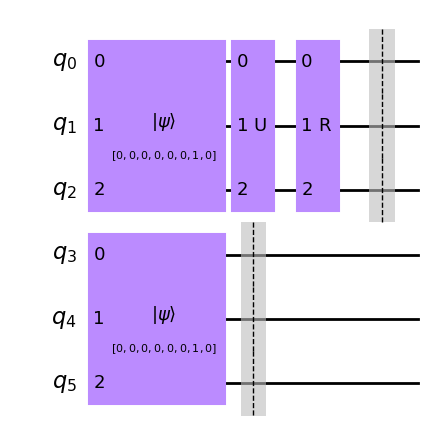

In [51]:
qc_6 = qc[6]
qc_6.draw('mpl')

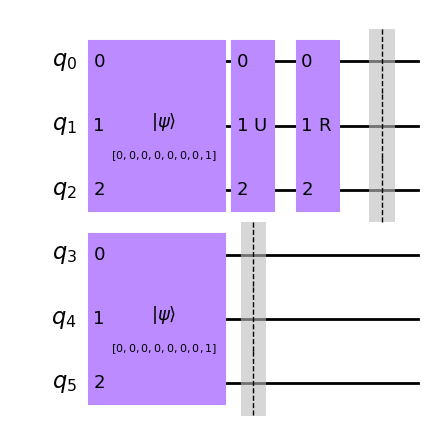

In [52]:
qc_7 = qc[7]
qc_7.draw('mpl')

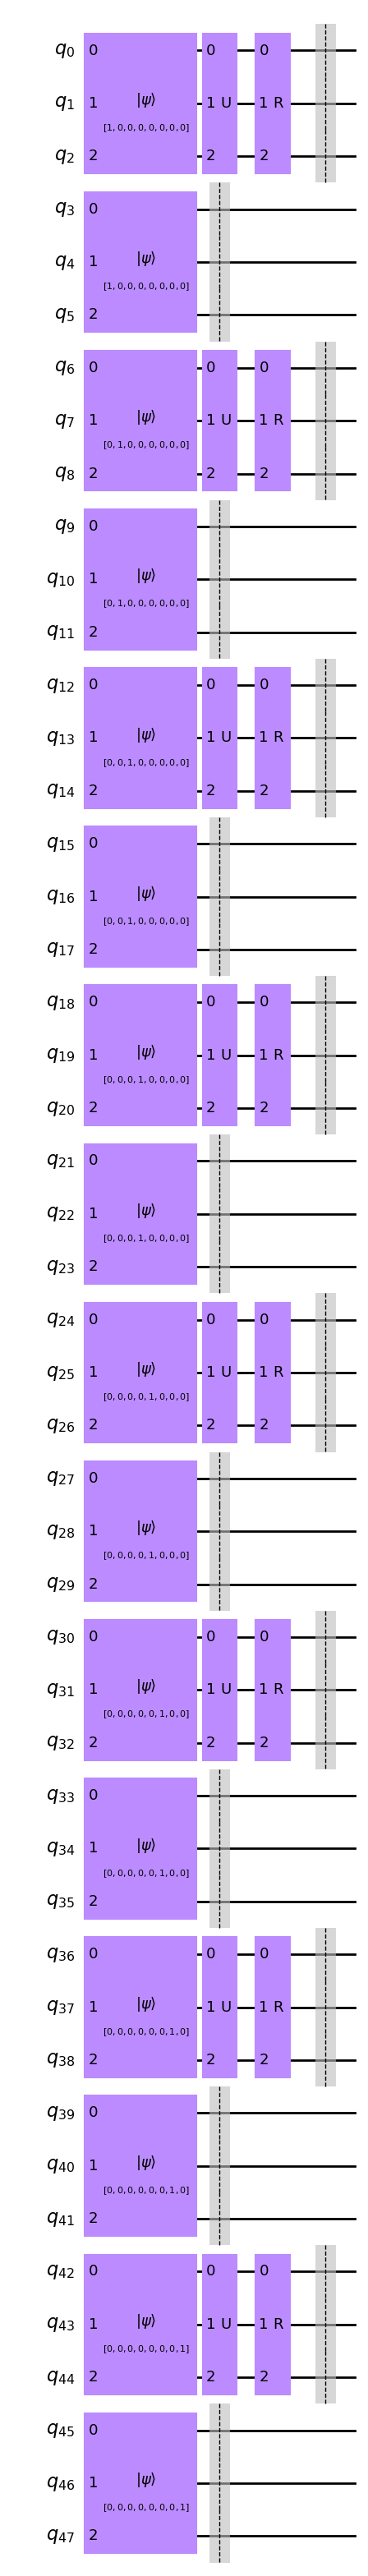

In [55]:
qc = qc_7.tensor(qc_6)
qc = qc.tensor(qc_5)
qc = qc.tensor(qc_4)
qc = qc.tensor(qc_3)
qc = qc.tensor(qc_2)
qc = qc.tensor(qc_1)
qc = qc.tensor(qc_0)
qc.draw('mpl')
